In [1]:
##Ben Pelto Nov. 2019
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

path = '/home/pelto/Desktop/ice_thick/'
f_in = 'smooth_window.csv' 

data = pd.read_csv(path + f_in)

# markers = ('o', 's', 'D', '^', 'v', 'p', 'D') #MUST be equal to # of glaciers
# colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462', '#b3de69'] #MUST be equal to # of glaciers

In [2]:
data[:5]

,glacier,sw,glen a,thick,vol,quad_errors,n_obs,normal,errors_pp,err_m,perc_err
0,Conrad,71,7.055,99.74,1.326,2805976,824,1.000000,3405,58.4,58.5
1,Conrad,101,7.055,99.90,1.328,2805976,824,1.000000,3405,58.4,58.4
2,Conrad,151,6.444,101.39,1.348,2735637,824,0.974932,3320,57.6,56.8
3,Conrad,201,6.166,103.38,1.362,2692524,824,0.959568,3268,57.2,55.3
4,Conrad,251,5.833,104.54,1.378,2661988,824,0.948685,3231,56.8,54.4


# Single plot: model obs grad versus model default grad (flowline)

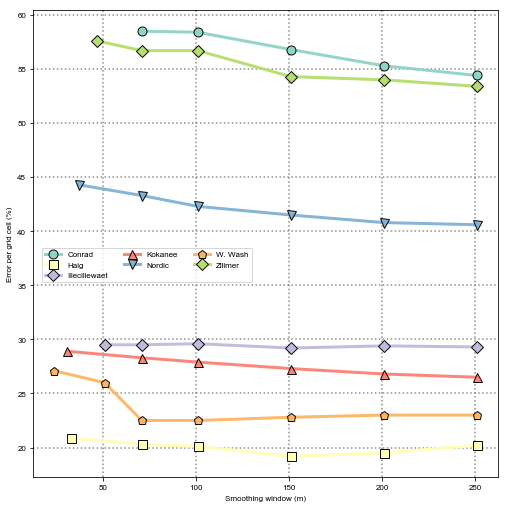

In [4]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 8}

plt.rc('font', **font)

# xmax=170
# ymax=170

# Create plot
fig = plt.figure(figsize=(7,7))#3.34, 3.34))
ax = fig.add_subplot(1, 1, 1) 

markers = ('o', 's', 'D', '^', 'v', 'p', 'D')
colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462', '#b3de69']
################
count=0
for name in np.unique(data['glacier']):
    V=data[data.glacier==name]

    ax.plot(V['sw'], V['perc_err'], alpha=0.95, c=colors[count], markeredgecolor='k', 
                marker=markers[count], label=name, markersize='9', linewidth=3.)
    count+=1

# for x, y, marker, color in zip(data['sw'], data['quad_errors'], data['marker'], data['color']):
#     ax.plot(x, y, alpha=0.25, c=color, markeredgecolor='k', marker=marker, label=None, markersize='8')

# for x, y, marker in zip(data['ALS_Ba590'], data['obs_Ba'],
#                                     data['ALS_errorBa'], data['obs_error_ba'], markers):
#     ax.errorbar(x, y, xerr=xerr, yerr=yerr, alpha=0.45, c='grey', ecolor='k', elinewidth=0.5,
#                 marker=marker, markersize='8')

## only plot first occurrence of site names
## bale out after n = 6
# z = 1
# for x, y, site, marker, color in zip(data['sw'], data['quad_errors'], data['glacier'], data['marker'], data['color']):
#     ax.plot(x, y, marker=marker, color=color, alpha=0.25, label=site)
#     z += 1
#     if z >= 8:
#         break

################
# plt.plot(np.arange(0, xmax), np.arange(0, ymax), '--', c='k', alpha=0.75, linewidth=1)

# # for x, y, marker in zip(data['Ice_thickness_Obs_grad'], data['Ice_thickness_model_grad'], markers):
# #     ax.plot(x,y, alpha=1.0, c='red', marker=marker, label=None, markersize='8')
    
# z = 1

# for x, y, site, marker, colors in zip(data['thick'], data['quad_errors'], 
#                               data['glacier'], markers, colors):
#     ax.plot(x,y, alpha=1.0, c=colors, marker=marker, label=site, markersize='8', markeredgecolor='k')
#     z += 1
#     if z >= 8: ## must be one greater than num. of points
#         break
# #     ax.errorbar(x, y, xerr=xerr, yerr=yerr, alpha=0.75, c='red', ecolor='k', elinewidth=0.5,
# #                 marker=marker, label=None, markersize='8')


# for x, y, site, marker in zip(data['Ice_thickness_Obs_grad'], data['Ice_thickness_model_grad'], data['name'], markers):
                                                                                    
# #     ax.errorbar(x, y, marker=marker, color='grey', alpha=0.5, label=site, elinewidth=0.25)
#     z += 1
#     if z >= 7:
#         break
        
plt.legend(loc='upper left', bbox_to_anchor=(0.01, 0.5), ncol=3)

# # plt.xlim(0,xmax)
# # plt.ylim(0,ymax)
# plt.xticks(np.arange(0, xmax, 25))
# plt.yticks(np.arange(0, ymax, 25))
plt.grid(linestyle=':', linewidth=1.5, color='gray', alpha=0.9, zorder=100)

plt.xlabel('Smoothing window (m)')
plt.ylabel('Error per grid cell (%)')#'Accum. quadratic errors (m)')
plt.tight_layout(pad=0.6)
plt.savefig(path + 'JoG/smooth_window_quad_errors_scatter.pdf', dpi=300)
plt.show()

In [12]:
d_200 = np.average(data[data['sw'] == 201]['perc_err'])
d_200

35.542857142857144

In [13]:
d_250 = np.average(data[data['sw'] == 251]['perc_err'])
d_250

35.34285714285714

In [14]:
d_150 = np.average(data[data['sw'] == 151]['perc_err'])
d_150

35.871428571428574

# 3-panel plot: 
   - model grad vs obs grad (flowline)
   - observations vs obs grad (gpr locations)
   - observations vs model grad (gpr locations)

In [ ]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 8}

plt.rc('font', **font)

xmax=180
ymax=180

# Create plot
axes = np.arange(1,3,1)
fig, axes = plt.subplots(1, 3, figsize=(7, 3.34), sharey=True)

letter = 'a', 'b', 'c'
for n in range(3):
    axes[n].plot(np.arange(0, xmax), np.arange(0, ymax), '--', c='k', alpha=0.75, linewidth=1)
    axes[n].text(162,8, letter[n], fontweight='bold', fontsize=10)
    axes[n].set_xlim(0,xmax)
    axes[n].set_ylim(0,ymax)
    axes[n].set_xticks(np.arange(0, xmax, 25))
    axes[n].set_yticks(np.arange(0, ymax, 25))
    axes[n].grid(linestyle=':', linewidth=1, color='gray', alpha=1.0, zorder=100)

### model obs grad versus model default grad (flowline)
  
z = 1

for x, y, site, marker, colors in zip(data['Ice_thickness_Obs_grad'], data['Ice_thickness_model_grad'], 
                              data['Glacier'], markers, colors):
    axes[0].plot(x,y, alpha=1.0, c=colors, marker=marker, label=site, markersize='8', markeredgecolor='k')
    z += 1
    if z >= 8: ## must be one greater than num. of points
        break
        
markers = ('o', 's', 'D', '^', 'v', 'p', 'D') 
colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462', '#b3de69'] 


#model obs grad versus observations (gprlocs)
  
z = 1

for x, y, site, marker, colors in zip(data['Observed'], data['Ice_thickness_Obs_grad_gprlocs'], 
                              data['Glacier'], markers, colors):
    axes[2].plot(x,y, alpha=1.0, c=colors, marker=marker, label=site, markersize='8', markeredgecolor='k')
    z += 1
    if z >= 8:
        break

markers = ('o', 's', 'D', '^', 'v', 'p', 'D') 
colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462', '#b3de69'] 

### model grad versus observations (gprlocs)
z = 1

for x, y, site, marker, colors in zip(data['Observed'], data['Ice_thickness_model_grad_gprlocs'], 
                              data['Glacier'], markers, colors):
    axes[1].plot(x,y, alpha=1.0, c=colors, marker=marker, label=site, markersize='8', markeredgecolor='k')
    z += 1
    if z >= 8:
        break
        
axes[0].legend(loc=2)

axes[0].set_xlabel('Modeled ice thickness obs. grad. (m)')
axes[0].set_ylabel('Modeled ice thickness model grad. (m)')
axes[2].set_xlabel('Observed ice thickness (m)')
axes[2].set_ylabel('Modeled ice thickness obs. grad. (m)')
axes[1].set_xlabel('Observed ice thickness (m)')
axes[1].set_ylabel('Modeled ice thickness model grad. (m)')

plt.tight_layout(pad=0.5)
plt.savefig(path + 'JoG/obs_model_ice_thick_scatter_3panel.pdf', dpi=300)
plt.show()